# Project2 
## Classification
Abstract: The purpose of this study was to examine associations between the physical characteristics of mushrooms, and to build a model that accurately predicts the edibility of a mushroom given these characteristics.

Source Link: https://www.kaggle.com/uciml/mushroom-classification File name used: mushrooms.csv

Evaluation strategy: Accuracy is used as an evaluation strategy because accuracy is easy to understand and easily suited for binary as well as a multiclass classification problem.

There are no missing values in the original datasets, values are manually removed.

### Importing Libraries

In [1]:
 #importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
%matplotlib inline
import warnings

In [2]:
#Data set
dataset = pd.read_csv('mushrooms.csv')
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [3]:
#missingvalues
dataset = dataset[dataset['stalk-root'] != '?']

In [4]:
#shape
dataset.shape

(5644, 23)

In [5]:
#check for null
dataset.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
 #introducing NaN values as the original data set did not have null values
X = dataset.iloc[:,1:23]  #all features and no labels
y = dataset.iloc[:, 0]  # all labels only

for i in range((int)(X.size * 0.1)):
    row_index = np.random.randint(X.shape[0])
    col_index = np.random.randint(X.shape[1])
    col = X.columns[col_index]
    X.iloc[row_index][col] = np.nan

# Check what percentage of the data is missing
val = 0
for col in X.columns:
    val += X[col].count()

#print(val / X.size)

In [7]:
#Nan values  
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,NaN,p,NaN,s,u
1,x,s,NaN,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,NaN
2,NaN,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,NaN,p,n,NaN,m
3,x,y,w,t,NaN,f,c,n,n,e,...,s,w,NaN,p,w,o,p,k,s,u
4,NaN,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [8]:
X.isna().sum()

cap-shape                   564
cap-surface                 538
cap-color                   541
bruises                     501
odor                        506
gill-attachment             523
gill-spacing                539
gill-size                   562
gill-color                  573
stalk-shape                 547
stalk-root                  580
stalk-surface-above-ring    536
stalk-surface-below-ring    498
stalk-color-above-ring      501
stalk-color-below-ring      557
veil-type                   531
veil-color                  549
ring-number                 514
ring-type                   523
spore-print-color           534
population                  517
habitat                     565
dtype: int64

### imputing Nan values

In [9]:

df_most_common_imputed = X.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_most_common_imputed

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,n,s,u
1,x,s,g,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,d
2,x,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,v,m
3,x,y,w,t,n,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,b,y,n,f,n,f,c,b,w,e,...,y,n,n,p,w,t,p,w,y,p
8001,x,y,n,f,n,f,c,b,w,e,...,y,n,n,p,w,t,p,w,y,d
8038,x,y,g,t,n,f,c,b,w,t,...,s,w,w,p,w,t,p,w,y,d
8095,x,y,c,f,m,f,c,b,y,e,...,y,c,c,p,w,n,n,w,c,d


### After imputing Nan

In [10]:
df_most_common_imputed.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### joining the y label

In [11]:
df_cat = df_most_common_imputed.join(y)
df_cat

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,n,s,u,p
1,x,s,g,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,d,e
2,x,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,v,m,e
3,x,y,w,t,n,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,b,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,e
8001,x,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,d,e
8038,x,y,g,t,n,f,c,b,w,t,...,w,w,p,w,t,p,w,y,d,e
8095,x,y,c,f,m,f,c,b,y,e,...,c,c,p,w,n,n,w,c,d,p


### 22 features, 1 label( 2 classifications: either Edible(e) or Poisonous (p)

In [12]:
df_cat['class'].unique()

array(['p', 'e'], dtype=object)

### converting Categorical to numerical:
#### creating dummies where needed as per the column description and values and applying map for columns with only two types of unique values

In [13]:
cols = pd.get_dummies(df_cat['cap-shape'], prefix= 'cap-shape')
df_cat[cols.columns] = cols
df_cat.drop('cap-shape', axis = 1, inplace = True)

In [14]:
cols = pd.get_dummies(df_cat['cap-surface'], prefix= 'cap-surface')
df_cat[cols.columns] = cols
df_cat.drop('cap-surface', axis = 1, inplace = True)

In [15]:
cols = pd.get_dummies(df_cat['cap-color'], prefix= 'cap-color')
df_cat[cols.columns] = cols
df_cat.drop('cap-color', axis = 1, inplace = True)

In [16]:
df_cat['bruises'].unique()

array(['t', 'f'], dtype=object)

In [17]:
df_cat['bruises'] = df_cat['bruises'].map({'f':0, 't':1}).astype(float)

In [18]:
cols = pd.get_dummies(df_cat['odor'], prefix= 'odor')
df_cat[cols.columns] = cols
df_cat.drop('odor', axis = 1, inplace = True)

In [19]:
cols = pd.get_dummies(df_cat['gill-attachment'], prefix= 'gill-attachment')
df_cat[cols.columns] = cols
df_cat.drop('gill-attachment', axis = 1, inplace = True)

In [20]:
cols = pd.get_dummies(df_cat['gill-spacing'], prefix= 'gill-spacing')
df_cat[cols.columns] = cols
df_cat.drop('gill-spacing', axis = 1, inplace = True)

In [21]:
df_cat['gill-size'].unique()

array(['n', 'b'], dtype=object)

In [22]:
df_cat['gill-size'] = df_cat['gill-size'].map({'b':0, 'n':1}).astype(float)

In [23]:
cols = pd.get_dummies(df_cat['gill-color'], prefix= 'gill-color')
df_cat[cols.columns] = cols
df_cat.drop('gill-color', axis = 1, inplace = True)

In [24]:
df_cat['stalk-shape'].unique()

array(['e', 't'], dtype=object)

In [25]:
df_cat['stalk-shape'] = df_cat['stalk-shape'].map({'e':0, 't':1}).astype(float)

In [26]:
cols = pd.get_dummies(df_cat['stalk-root'], prefix= 'stalk-root')
df_cat[cols.columns] = cols
df_cat.drop('stalk-root', axis = 1, inplace = True)

In [27]:
cols = pd.get_dummies(df_cat['stalk-surface-above-ring'], prefix= 'stalk-surface-above-ring')
df_cat[cols.columns] = cols
df_cat.drop('stalk-surface-above-ring', axis = 1, inplace = True)

In [28]:
cols = pd.get_dummies(df_cat['stalk-surface-below-ring'], prefix= 'stalk-surface-below-ring')
df_cat[cols.columns] = cols
df_cat.drop('stalk-surface-below-ring', axis = 1, inplace = True)

In [29]:
cols = pd.get_dummies(df_cat['stalk-color-above-ring'], prefix= 'stalk-color-above-ring')
df_cat[cols.columns] = cols
df_cat.drop('stalk-color-above-ring', axis = 1, inplace = True)

In [30]:
cols = pd.get_dummies(df_cat['stalk-color-below-ring'], prefix= 'stalk-color-below-ring')
df_cat[cols.columns] = cols
df_cat.drop('stalk-color-below-ring', axis = 1, inplace = True)

In [31]:
df_cat['veil-type'].unique()

array(['p'], dtype=object)

In [32]:
df_cat['veil-type'] = df_cat['veil-type'].map({'p':0, 'u':1}).astype(float)

In [33]:
cols = pd.get_dummies(df_cat['veil-color'], prefix= 'veil-color')
df_cat[cols.columns] = cols
df_cat.drop('veil-color', axis = 1, inplace = True)

In [34]:
df_cat['ring-number'].unique()

array(['o', 't', 'n'], dtype=object)

In [35]:
df_cat['ring-number'] = df_cat['ring-number'].map({'n':0, 'o':1,'t':2}).astype(float)

In [36]:
cols = pd.get_dummies(df_cat['ring-type'], prefix= 'ring-type')
df_cat[cols.columns] = cols
df_cat.drop('ring-type', axis = 1, inplace = True)

In [37]:
cols = pd.get_dummies(df_cat['spore-print-color'], prefix= 'spore-print-color')
df_cat[cols.columns] = cols
df_cat.drop('spore-print-color', axis = 1, inplace = True)

In [38]:
cols = pd.get_dummies(df_cat['population'], prefix= 'population')
df_cat[cols.columns] = cols
df_cat.drop('population', axis = 1, inplace = True)

In [39]:
cols = pd.get_dummies(df_cat['habitat'], prefix= 'habitat')
df_cat[cols.columns] = cols
df_cat.drop('habitat', axis = 1, inplace = True)

In [40]:
df_cat['class'].unique()

array(['p', 'e'], dtype=object)

In [41]:
df_cat['class'] = df_cat['class'].map({'p':0, 'e':1}).astype(float)#Poisonous = 0, edible = 1

### after coverting categorical to numerical using label encoding

In [42]:
mush_df =df_cat
#mush_df.head()
mush_df.shape

(5644, 94)

### checking number of rows having  y label as 1 - Edible and 0 - Poisonous     

In [43]:
print(mush_df.groupby('class').size())

class
0.0    2156
1.0    3488
dtype: int64


### List of 5 numerical variables for correlation

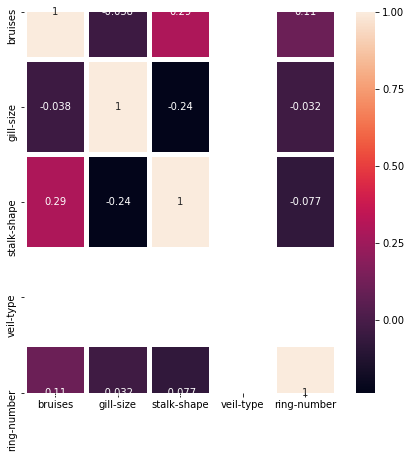

In [44]:
mush_df_7 = mush_df[['bruises','gill-size', 'stalk-shape','veil-type', 'ring-number']]
a = mush_df_7.corr()
fig=plt.figure(figsize=(7,7))
sns.heatmap(a,annot= True,linewidths=4)

### Splitting into train and test 

In [45]:
from sklearn.model_selection import train_test_split
X = mush_df.drop('class',axis=1)
y = mush_df['class']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

### Min Max Scaler

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### warnings import

In [47]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Algorithms - Classification

### Voting                 

In [48]:
# Using the best parameters (from project 1)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2',C=10)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

from sklearn.svm import SVC
svc_lin = SVC(kernel='linear',C=1,probability=True)

from sklearn.svm import SVC
svc_rbf = SVC(kernel='rbf',C=10,gamma=0.5,probability=True)

from sklearn.svm import SVC
svc_poly = SVC(kernel='poly',C=1,gamma=10,probability=True)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=7)

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)   

from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(random_state=0,max_depth=3,learning_rate=0.5)


### Hard Voting

In [49]:

from sklearn.ensemble import VotingClassifier 

estimator1 = [('knn',knn),('rnd_clf',rnd_clf),('gbc_clf',gbc_clf),('dtree',dtree)]  
voting1 = VotingClassifier(estimator1,voting='hard')  
voting1.fit(X_train,y_train)  

from sklearn.metrics import accuracy_score  

for clf in (knn,rnd_clf,gbc_clf,dtree,voting1):  
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)   
    print(clf.__class__.__name__, " ", accuracy_score(y_test, y_pred))  
    
    

KNeighborsClassifier   0.9991142604074402
RandomForestClassifier   0.9840566873339238
GradientBoostingClassifier   0.9991142604074402
DecisionTreeClassifier   0.9858281665190434
VotingClassifier   0.9991142604074402


### Soft Voting

In [50]:
from sklearn.ensemble import VotingClassifier  

estimator1 = [('svc_lin',svc_lin),('svc_rbf',svc_rbf),('svc_poly',svc_poly)]  
voting2 = VotingClassifier(estimator1,voting='soft')  
voting2.fit(X_train,y_train)  

from sklearn.metrics import accuracy_score

for clf in (svc_lin,svc_rbf,svc_poly,voting2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))  

SVC 0.9946855624446412
SVC 0.9991142604074402
SVC 0.9991142604074402
VotingClassifier 0.9982285208148804


## Bagging 
#### best parameters are taken from project 1 for each model in this project 2

## 1.  SVC with rbf Kernal

In [51]:
svc_rbf = SVC(C=10,kernel='rbf')
svc_rbf.fit(X_train,y_train)
print("Accuracy on Train set: {:.4f}".format(svc_rbf.score(X_train, y_train)))
print("Accuracy on Test set: {:.4f}".format(svc_rbf.score(X_test, y_test)))

Accuracy on Train set: 0.9982
Accuracy on Test set: 0.9938


### Bagging

In [52]:
from sklearn.ensemble import BaggingClassifier  
svc_rbf = SVC(C=10,kernel='rbf')
bag_svc_rbf = BaggingClassifier(svc_rbf,n_estimators=500,max_samples=1000,random_state=0)
bag_svc_rbf.fit(X_train,y_train)
print("Accuracy on Train set: {:.4f}".format(bag_svc_rbf.score(X_train, y_train)))
print("Accuracy on Test set: {:.4f}".format(bag_svc_rbf.score(X_test, y_test)))

Accuracy on Train set: 0.9911
Accuracy on Test set: 0.9841


*  Before Bagging - train and test accuracies using SVC with "rbf" are 0.9982 and 0.9938
*  After Bagging  -  train and test accuracies using SVC with "rbf" are 0.9911 and 0.9841 respectively   
* Both test and train scores are reduced after Bagging, the difference between train and test scores also increased. Hence, cannot be considered as generalized model

## 2. Logistic Regression 

In [53]:
logreg = LogisticRegression(penalty='l2', C=10, solver="liblinear")
logreg.fit(X_train, y_train)
print("Accuracy on Train set: {:.4f}".format(logreg.score(X_train, y_train)))
print("Accuracy on Test set: {:.4f}".format(logreg.score(X_test, y_test)))

Accuracy on Train set: 0.9984
Accuracy on Test set: 0.9938


### Bagging

In [54]:

from sklearn.ensemble import BaggingClassifier
logreg = LogisticRegression(penalty='l2', C=10, solver="liblinear")
logreg.fit(X_train, y_train)
bag_log = BaggingClassifier(logreg,n_estimators=1000,max_samples=1000,random_state=0, bootstrap=True)
bag_log.fit(X_train,y_train)
print("Accuracy on Train set: {:.4f}".format(bag_log.score(X_train, y_train)))
print("Accuracy on Test set: {:.4f}".format(bag_log.score(X_test, y_test)))

Accuracy on Train set: 0.9965
Accuracy on Test set: 0.9911


*  Before Bagging - train and test accuracies using Logistic Regression are 0.9984 and 0.9938
*  After Bagging  -  train and test accuracies using Logistic Regression are 0.9965 and 0.9911 respectively   
*  There isn't much difference in the difference between test and train scores before and after bagging in the model

# Pasting

## 1. KNN Classifier

In [55]:
knn = KNeighborsClassifier()  
knn.fit(X_train, y_train)
print("Accuracy of Train set: {:.4f}".format(knn.score(X_train, y_train)))
print("Accuracy of Test set: {:.4f}".format(knn.score(X_test, y_test)))  

Accuracy of Train set: 0.9996
Accuracy of Test set: 0.9991


### Pasting

In [56]:
from sklearn.ensemble import BaggingClassifier   
knn = KNeighborsClassifier()
pa_knn = BaggingClassifier(knn,n_estimators=100,max_samples=1000,random_state=0,bootstrap=False)
pa_knn.fit(X_train,y_train)
print("Accuracy of Train set: {:.4f}".format(pa_knn.score(X_train, y_train)))
print("Accuracy of Test set: {:.4f}".format(pa_knn.score(X_test, y_test)))  

Accuracy of Train set: 0.9976
Accuracy of Test set: 0.9938


* Before Pasting - the train and test accuracies for KNN Classifier are 0.9991 and 0.9982 respectively
* After Pasting  - the train and test accuracies for KNN Classifier are 0.9967 and 0.9938 respectively
* Though both test and train scores are reduced after pasting, the difference between train and test scores less. it can be considered as a generalized model

## 2. SVC with "linear" Kernel

In [57]:
svc_li = SVC(C=1,kernel='linear')
svc_li.fit(X_train,y_train)
print("Accuracy on Train set: {:.4f}".format(svc_li.score(X_train, y_train)))
print("Accuracy on Test set: {:.4f}".format(svc_li.score(X_test, y_test)))

Accuracy on Train set: 0.9984
Accuracy on Test set: 0.9947


### pasting

In [58]:
from sklearn.ensemble import BaggingClassifier   
svc_li = SVC(kernel='linear',C=1) 
pa_svc_lin = BaggingClassifier(svc_li,n_estimators=100,max_samples=2000,random_state=0,bootstrap=False) 
pa_svc_lin.fit(X_train,y_train) 
print("Accuracy on Train set: {:.4f}".format(pa_svc_lin.score(X_train, y_train))) 
print("Accuracy on Test set: {:.4f}".format(pa_svc_lin.score(X_test, y_test)))   

Accuracy on Train set: 0.9978
Accuracy on Test set: 0.9938


- Before Bagging - train and test accuracies using SVC with "linear" are 0.9984 and 0.9947
- After Bagging - train and test accuracies using SVC with "linear" are 0.9978 and 0.9938 respectively
- There isn't much difference in the difference between test and train scores before and after pasting in the model

# Ada Boosting

### 1.  SVC with 'poly' Kernel 

In [59]:
svc_po = SVC(C=10, kernel='poly', gamma=10)  
svc_po.fit(X_train,y_train) 
print("Accuracy on Train set: {:.4f}".format(svc_po.score(X_train, y_train))) 
print("Accuracy on Test set: {:.4f}".format(svc_po.score(X_test, y_test))) 

Accuracy on Train set: 1.0000
Accuracy on Test set: 0.9991


### Ada Boosting

In [60]:

from sklearn.ensemble import AdaBoostClassifier 
svc_po = SVC(kernel='poly',C=10,gamma=10) 
ada_svc_po = AdaBoostClassifier(svc_po,n_estimators=200,learning_rate=0.5 , algorithm='SAMME') 
ada_svc_po.fit(X_train,y_train) 
print("Accuracy on Train set: {:.4f}".format(ada_svc_po.score(X_train, y_train))) 
print("Accuracy on Test set: {:.4f}".format(ada_svc_po.score(X_test, y_test))) 

Accuracy on Train set: 1.0000
Accuracy on Test set: 0.9991


- Before AdaBoosting - the train and test accuracies using SVC with poly are 1.0000 and 0.9991
- After  :  the train and test accuracies using SVC with poly are 1.0000 and 0.9991
- No difference after Ada Boosting

# 2.Decision Tree    

In [61]:
detree = DecisionTreeClassifier(criterion = 'entropy',max_depth=7, random_state=0)
detree.fit(X_train, y_train)
print("Accuracy on Train set: {:.4f}".format(detree.score(X_train, y_train)))
print("Accuracy on Test set: {:.4f}".format(detree.score(X_test, y_test)))

Accuracy on Train set: 0.9951
Accuracy on Test set: 0.9876


### ada boosting

In [62]:
from sklearn.ensemble import AdaBoostClassifier 
detree = DecisionTreeClassifier(max_depth=7, random_state=0) 
detree.fit(X_train, y_train) 
ada_detree = AdaBoostClassifier(detree,n_estimators=100,learning_rate=0.5,algorithm='SAMME.R') 
ada_detree.fit(X_train,y_train) 
print("Accuracy on Train set: {:.4f}".format(ada_detree.score(X_train, y_train))) 
print("Accuracy on Test set: {:.4f}".format(ada_detree.score(X_test, y_test))) 

Accuracy on Train set: 1.0000
Accuracy on Test set: 0.9982


- Before AdaBoosting, the train and test accuracies for Decision Tree are 0.9951 and 0.9876 respectively
- After , the train and test accuracies for Decision Tree are 1.0000 and 0.9982 respectively
- Both test and train scores are increased after AdaBoosting

# Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier 
gbrt_d = GradientBoostingClassifier(random_state=0, max_depth=1) 
gbrt_d.fit(X_train, y_train) 

print("Accuracy on Train set: {:.4f}".format(gbrt_d.score(X_train, y_train))) 
print("Accuracy on Test set: {:.4f}".format(gbrt_d.score(X_test, y_test))) 

Accuracy on Train set: 0.9770
Accuracy on Test set: 0.9637


In [64]:
gbr = GradientBoostingClassifier(random_state=0, learning_rate=0.5)

gbr.fit(X_train, y_train)
print("Accuracy on Train set: {:.4f}".format(gbr.score(X_train, y_train)))
print("Accuracy on Test set: {:.4f}".format(gbr.score(X_test, y_test)))

Accuracy on Train set: 1.0000
Accuracy on Test set: 0.9991


For Gradient Boosting without learning rate, the train and test accuracies are 0.9770 and 0.9637
For Gradient Boosting with learning rate, the train and test accuracies are 1.0000 and 0.9991
Both test and train scores are increased here

# PCA

In [65]:
from  sklearn.decomposition import PCA 

pcan= PCA(n_components=0.95) 
pcan.fit(X_train) 
X_train= pcan.transform(X_train) 
X_test=pcan.transform(X_test) 

In [66]:
# num of components after PCA
pcan.n_components_

38

# 1. Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000,100000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


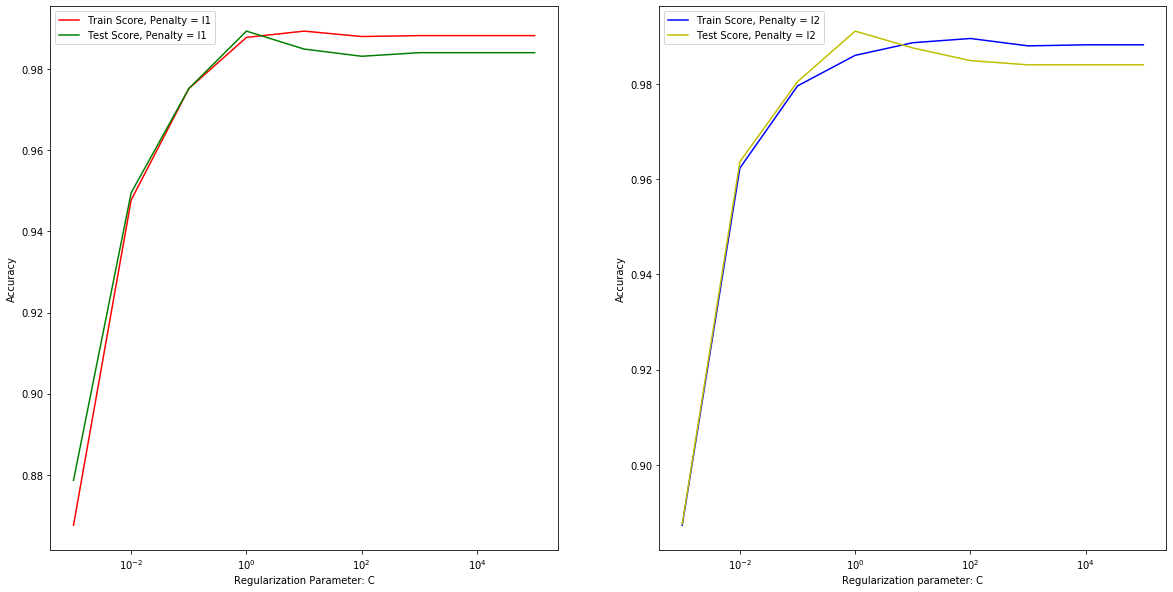

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train Score, Penalty = l1',c='r')
plt.plot(c_range, test_score_l1, label = 'Test Score, Penalty = l1',c='g')
plt.legend()
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train Score, Penalty = l2',c='b')
plt.plot(c_range, test_score_l2, label = 'Test Score, Penalty = l2',c='y')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

L2 Regularization with C=1 gives better accuracies. With L2 penalty, the train and test accuracies are very close at C=1. 

In [69]:
logreg = LogisticRegression(penalty='l2', C=1)
logreg.fit(X_train, y_train)
print("Accuracy on Train set: {:.4f}".format(logreg.score(X_train, y_train)))
print("Accuracy on Test set: {:.4f}".format(logreg.score(X_test, y_test)))

Accuracy on Train set: 0.9860
Accuracy on Test set: 0.9911


In [70]:
from  sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9911426040744021


##  2. KNN Classification

In [71]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix  

%matplotlib inline

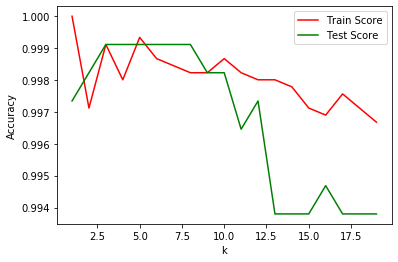

In [72]:

train_score = [] 
test_score = [] 

n = range(1,20) 
for i in n:
    knnn = KNeighborsClassifier(n_neighbors=i) 
    knnn.fit(X_train,y_train)
    train_score.append(knnn.score(X_train,y_train)) 
    test_score.append(knnn.score(X_test,y_test)) 
plt.plot(n,train_score,'r',label='Train Score') 
plt.plot(n,test_score,'g',label = 'Test Score') 
plt.xlabel('k') 
plt.ylabel('Accuracy') 
plt.legend() 

It looks like k = 5 has the highest test score and is very close to the train score,thus k=5 as the best parameter for KNN Model  

In [73]:
knnn =  KNeighborsClassifier(5) 
knnn.fit(X_train, y_train)  
print("Accuracy on Train set: {:.4f}".format(knnn.score(X_train, y_train))) 
print("Accuracy on Test set: {:.4f}".format(knnn.score(X_test, y_test))) 

Accuracy on Train set: 0.9993
Accuracy on Test set: 0.9991


In [74]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


# 3. Linear SVM Classification

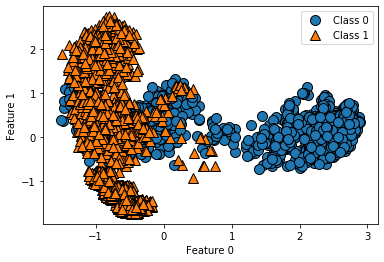

In [75]:
import mglearn
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1") 
plt.legend(['Class 0', 'Class 1']) 

In [76]:
from sklearn.svm import LinearSVC
lin_svm = LinearSVC(C=100)
lin_svm.fit(X_train,y_train)
print("Accuracy on Train set: {:.4f}".format(lin_svm.score(X_train,y_train)))
print("Accuracy on Test set: {:.4f}".format(lin_svm.score(X_test,y_test)))

Accuracy on Train set: 0.9876
Accuracy on Test set: 0.9823


C:\Users\vmadh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


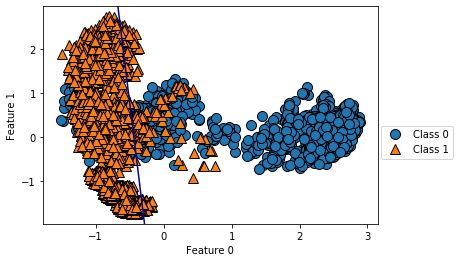

In [77]:
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
line = np.linspace(-5, 5)
for coef, intercept, color in zip(lin_svm.coef_, lin_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1'], loc=(1.01, 0.3))

# 4. Kernelized SVM

### kernal linear

In [78]:
C1 = [0.01,0.1,1,10]
for i in C1:
    svc = SVC(C=i,kernel='linear')
    svc.fit(X_train,y_train)
    print('C:{}'.format(i))
    print('Train Score: {:.4f}, Test Score: {:.4f}'.format(svc.score(X_train,y_train),svc.score(X_test,y_test)))

C:0.01
Train Score: 0.9721, Test Score: 0.9690
C:0.1
Train Score: 0.9836, Test Score: 0.9858
C:1
Train Score: 0.9872, Test Score: 0.9894
C:10
Train Score: 0.9887, Test Score: 0.9823


In [79]:
svc_lin = SVC(C=10,kernel='linear')
svc_lin.fit(X_train,y_train)
print("Accuracy on Train set: {:.4f}".format(svc_lin.score(X_train, y_train)))
print("Accuracy on Test set: {:.4f}".format(svc_lin.score(X_test, y_test)))

Accuracy on Train set: 0.9887
Accuracy on Test set: 0.9823


### kernal RBF

In [80]:
C1 = [0.01,0.1,1,10]
gamma1 = [0.01,0.1,1,10]

for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='rbf',gamma=j)
        svc.fit(X_train,y_train)
        print('C:{},gamma:{}'.format(i,j))
        print('Train Score: {:.4f}, Test Score: {:.4f}'.format(svc.score(X_train,y_train),svc.score(X_test,y_test)))

C:0.01,gamma:0.01
Train Score: 0.8443, Test Score: 0.8565
C:0.01,gamma:0.1
Train Score: 0.8944, Test Score: 0.8946
C:0.01,gamma:1
Train Score: 0.6175, Test Score: 0.6200
C:0.01,gamma:10
Train Score: 0.6175, Test Score: 0.6200
C:0.1,gamma:0.01
Train Score: 0.9586, Test Score: 0.9548
C:0.1,gamma:0.1
Train Score: 0.9934, Test Score: 0.9911
C:0.1,gamma:1
Train Score: 0.6175, Test Score: 0.6200
C:0.1,gamma:10
Train Score: 0.6175, Test Score: 0.6200
C:1,gamma:0.01
Train Score: 0.9814, Test Score: 0.9796
C:1,gamma:0.1
Train Score: 0.9993, Test Score: 0.9973
C:1,gamma:1
Train Score: 1.0000, Test Score: 0.9858
C:1,gamma:10
Train Score: 1.0000, Test Score: 0.6652
C:10,gamma:0.01
Train Score: 0.9922, Test Score: 0.9920
C:10,gamma:0.1
Train Score: 1.0000, Test Score: 0.9991
C:10,gamma:1
Train Score: 1.0000, Test Score: 0.9849
C:10,gamma:10
Train Score: 1.0000, Test Score: 0.6652


Best Parameter Values: C = 10, gamma = 0.1. Test score for C=10 and gamma=0.1 is highest among all

In [107]:
svc_rbf = SVC(C=10,kernel='rbf',gamma = 0.1)
svc_rbf.fit(X_train,y_train)
print("Accuracy on Train set: {:.4f}".format(svc_rbf.score(X_train, y_train)))
print("Accuracy on Test set: {:.4f}".format(svc_rbf.score(X_test, y_test)))

Accuracy on Train set: 1.0000
Accuracy on Test set: 0.9991


### polynomial Kernal

In [82]:
C1 = [0.01,0.1,1,10] 
gamma1 = [0.01,0.1,1,10] 
for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='poly',gamma=j)
        svc.fit(X_train,y_train)
        print('C:{},gamma:{}'.format(i,j))
        print('Train Score: {:.4f}, Test Score: {:.4f}'.format(svc.score(X_train,y_train),svc.score(X_test,y_test)))

C:0.01,gamma:0.01
Train Score: 0.6175, Test Score: 0.6200
C:0.01,gamma:0.1
Train Score: 0.8186, Test Score: 0.8326
C:0.01,gamma:1
Train Score: 1.0000, Test Score: 0.9991
C:0.01,gamma:10
Train Score: 1.0000, Test Score: 0.9991
C:0.1,gamma:0.01
Train Score: 0.6175, Test Score: 0.6200
C:0.1,gamma:0.1
Train Score: 0.9803, Test Score: 0.9734
C:0.1,gamma:1
Train Score: 1.0000, Test Score: 0.9991
C:0.1,gamma:10
Train Score: 1.0000, Test Score: 0.9991
C:1,gamma:0.01
Train Score: 0.6175, Test Score: 0.6200
C:1,gamma:0.1
Train Score: 0.9996, Test Score: 0.9982
C:1,gamma:1
Train Score: 1.0000, Test Score: 0.9991
C:1,gamma:10
Train Score: 1.0000, Test Score: 0.9991
C:10,gamma:0.01
Train Score: 0.8186, Test Score: 0.8326
C:10,gamma:0.1
Train Score: 1.0000, Test Score: 0.9991
C:10,gamma:1
Train Score: 1.0000, Test Score: 0.9991
C:10,gamma:10
Train Score: 1.0000, Test Score: 0.9991


Here, we can clearly see that C = 10 and gamma = 10 gives the best accuracy for our model

In [83]:
svc_poly = SVC(C=10, kernel='poly', gamma=10)
svc_poly.fit(X_train,y_train)
print("Accuracy on Train set: {:.4f}".format(svc_poly.score(X_train, y_train)))
print("Accuracy on Test set: {:.4f}".format(svc_poly.score(X_test, y_test)))

Accuracy on Train set: 1.0000
Accuracy on Test set: 0.9991


## 5. Decision tree

In [84]:
detree = DecisionTreeClassifier(max_depth=3, random_state=0)
detree.fit(X_train, y_train)

print("Accuracy on Train set: {:.4f}".format(detree.score(X_train, y_train)))
print("Accuracy on Test set: {:.4f}".format(detree.score(X_test, y_test)))

Accuracy on Train set: 0.9524
Accuracy on Test set: 0.9460


## Comparisons before and after PCA

In [112]:
Classifi = {'Models before PCA':['Logistic Regrerssion','KNN classification','SVC - linear','SVC - rbf','SVC - poly','Decision Tree'],'Train Score':[ 0.9989,1.0000,0.9989,1.0000,1.0000,0.9949],'Test_Score':[0.9973,0.9973,0.9982 ,0.9982,0.9982,0.9938]}
Classification_score = pd.DataFrame(Classifi)
Classification_score

,Models before PCA,Train Score,Test_Score
0,Logistic Regrerssion,0.9989,0.9973
1,KNN classification,1.0000,0.9973
2,SVC - linear,0.9989,0.9982
3,SVC - rbf,1.0000,0.9982
4,SVC - poly,1.0000,0.9982
5,Decision Tree,0.9949,0.9938


From the above information , KNN or SVC-rbf or SVC-Poly can be our best classification model

## After PCA

In [113]:
Classif = {'Models after PCA':['Logistic Regrerssion','KNN classification','SVC - linear','SVC - rbf','SVC - poly','Decision Tree'],'Train Score':[0.9860,0.9993,0.9823,1.0000,1.0000,0.9524],'Test_Score':[0.9911,0.9991,0.9876,0.9991,0.9991,0.9460]}
Classification_score = pd.DataFrame(Classif)
Classification_score

,Models after PCA,Train Score,Test_Score
0,Logistic Regrerssion,0.9860,0.9911
1,KNN classification,0.9993,0.9991
2,SVC - linear,0.9823,0.9876
3,SVC - rbf,1.0000,0.9991
4,SVC - poly,1.0000,0.9991
5,Decision Tree,0.9524,0.9460


After performing PCA, From the above information we can see that  SVC - poly and svc rbf are our best classification models

#### Before PCA, the models had high accuracies for both test and train. After dimesionality reduction by PCA, there is some loss of information, which resulted in a reduction of the train and test accuracies. So now we have a more genralized model compared to before as we are not considering the components which are not contributing to that much variance (can be considered as noise).

# Deep Learning Models

## 1. Perceptron

In [87]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [95]:
#1: build model
mod1 = Sequential()
#input layer
mod1.add(Dense(38, input_dim = 38, activation = 'relu'))
#hidden layers
mod1.add(Dense(50, activation = 'relu'))
#output layer
mod1.add(Dense(1, activation = 'sigmoid'))

In [96]:
#2: make computational graph :compile
mod1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

In [97]:
X_train.shape

(4515, 38)

In [101]:
#3: train the model: fit
mod1.fit(X_train, y_train, epochs = 200, batch_size = 300)

Epoch 1/200
16/16 [==============================] - 0s 3ms/step - loss: 2.3290e-10 - accuracy: 1.0000
Epoch 2/200
16/16 [==============================] - 0s 3ms/step - loss: 2.3325e-10 - accuracy: 1.0000
Epoch 3/200
16/16 [==============================] - 0s 3ms/step - loss: 2.3362e-10 - accuracy: 1.0000
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 2.3394e-10 - accuracy: 1.0000
Epoch 5/200
16/16 [==============================] - 0s 3ms/step - loss: 2.3425e-10 - accuracy: 1.0000
Epoch 6/200
16/16 [==============================] - 0s 3ms/step - loss: 2.3466e-10 - accuracy: 1.0000
Epoch 7/200
16/16 [==============================] - 0s 3ms/step - loss: 2.3500e-10 - accuracy: 1.0000
Epoch 8/200
16/16 [==============================] - 0s 3ms/step - loss: 2.3536e-10 - accuracy: 1.0000
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 2.3573e-10 - accuracy: 1.0000
Epoch 10/200
16/16 [==============================] - 0s 3ms/step - loss:

16/16 [==============================] - 0s 3ms/step - loss: 2.6088e-10 - accuracy: 1.0000
Epoch 80/200
16/16 [==============================] - 0s 3ms/step - loss: 2.6136e-10 - accuracy: 1.0000
Epoch 81/200
16/16 [==============================] - 0s 3ms/step - loss: 2.6170e-10 - accuracy: 1.0000
Epoch 82/200
16/16 [==============================] - 0s 3ms/step - loss: 2.6203e-10 - accuracy: 1.0000
Epoch 83/200
16/16 [==============================] - 0s 3ms/step - loss: 2.6249e-10 - accuracy: 1.0000
Epoch 84/200
16/16 [==============================] - 0s 2ms/step - loss: 2.6295e-10 - accuracy: 1.0000
Epoch 85/200
16/16 [==============================] - 0s 3ms/step - loss: 2.6349e-10 - accuracy: 1.0000
Epoch 86/200
16/16 [==============================] - 0s 3ms/step - loss: 2.6399e-10 - accuracy: 1.0000
Epoch 87/200
16/16 [==============================] - 0s 3ms/step - loss: 2.6434e-10 - accuracy: 1.0000
Epoch 88/200
16/16 [==============================] - 0s 3ms/step - loss: 2.6

16/16 [==============================] - 0s 3ms/step - loss: 2.8235e-10 - accuracy: 1.0000
Epoch 157/200
16/16 [==============================] - 0s 3ms/step - loss: 2.8243e-10 - accuracy: 1.0000
Epoch 158/200
16/16 [==============================] - 0s 3ms/step - loss: 2.8275e-10 - accuracy: 1.0000
Epoch 159/200
16/16 [==============================] - 0s 3ms/step - loss: 2.8313e-10 - accuracy: 1.0000
Epoch 160/200
16/16 [==============================] - 0s 3ms/step - loss: 2.8340e-10 - accuracy: 1.0000
Epoch 161/200
16/16 [==============================] - 0s 2ms/step - loss: 2.8355e-10 - accuracy: 1.0000
Epoch 162/200
16/16 [==============================] - 0s 2ms/step - loss: 2.8351e-10 - accuracy: 1.0000
Epoch 163/200
16/16 [==============================] - 0s 2ms/step - loss: 2.8377e-10 - accuracy: 1.0000
Epoch 164/200
16/16 [==============================] - 0s 3ms/step - loss: 2.8410e-10 - accuracy: 1.0000
Epoch 165/200
16/16 [==============================] - 0s 3ms/step - 

In [102]:
#4: evaluation
loss_and_metrics = mod1.evaluate(X_test, y_test)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

36/36 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 0.9991
Test Loss 0.00666241766884923
Test Accuracy 0.9991142749786377


## 2. MLP

In [103]:
#1: build model
mod2 = Sequential()
#input layer
mod2.add(Dense(38, input_dim = 38, activation = 'relu'))
#hidden layers
mod2.add(Dense(10, activation = 'relu'))
mod2.add(Dense(5, activation = 'relu'))
#output layer
mod2.add(Dense(1, activation = 'sigmoid'))

In [104]:
#2: compile the model
mod2.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

In [105]:
#3: train the model
mod2.fit(X_train, y_train, epochs = 200, batch_size = 300)

Epoch 1/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.7415
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.8671
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.8915
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.9025
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.9262
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.9530
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9654
Epoch 8/200
16/16 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.9745
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.9827
Epoch 10/200
16/16 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9863
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 3.9394e-04 - accuracy: 1.0000
Epoch 82/200
16/16 [==============================] - 0s 2ms/step - loss: 3.8246e-04 - accuracy: 1.0000
Epoch 83/200
16/16 [==============================] - 0s 2ms/step - loss: 3.7013e-04 - accuracy: 1.0000
Epoch 84/200
16/16 [==============================] - 0s 2ms/step - loss: 3.5682e-04 - accuracy: 1.0000
Epoch 85/200
16/16 [==============================] - 0s 2ms/step - loss: 3.4798e-04 - accuracy: 1.0000
Epoch 86/200
16/16 [==============================] - 0s 1ms/step - loss: 3.3669e-04 - accuracy: 1.0000
Epoch 87/200
16/16 [==============================] - 0s 2ms/step - loss: 3.2704e-04 - accuracy: 1.0000
Epoch 88/200
16/16 [==============================] - 0s 2ms/step - loss: 3.1770e-04 - accuracy: 1.0000
Epoch 89/200
16/16 [==============================] - 0s 2ms/step - loss: 3.0895e-04 - accuracy: 1.0000
Epoch 90/200
16/16 [==============================] - 0s 2ms/step - loss: 3.0

16/16 [==============================] - 0s 2ms/step - loss: 6.4284e-05 - accuracy: 1.0000
Epoch 160/200
16/16 [==============================] - 0s 2ms/step - loss: 6.3283e-05 - accuracy: 1.0000
Epoch 161/200
16/16 [==============================] - 0s 2ms/step - loss: 6.2057e-05 - accuracy: 1.0000
Epoch 162/200
16/16 [==============================] - 0s 2ms/step - loss: 6.1123e-05 - accuracy: 1.0000
Epoch 163/200
16/16 [==============================] - 0s 2ms/step - loss: 5.9940e-05 - accuracy: 1.0000
Epoch 164/200
16/16 [==============================] - 0s 2ms/step - loss: 5.8996e-05 - accuracy: 1.0000
Epoch 165/200
16/16 [==============================] - 0s 2ms/step - loss: 5.7851e-05 - accuracy: 1.0000
Epoch 166/200
16/16 [==============================] - 0s 2ms/step - loss: 5.8912e-05 - accuracy: 1.0000
Epoch 167/200
16/16 [==============================] - 0s 2ms/step - loss: 5.6943e-05 - accuracy: 1.0000
Epoch 168/200
16/16 [==============================] - 0s 1ms/step - 

In [106]:
#4: evaluate
mod2.evaluate(X_test, y_test) 
print("Test Loss", loss_and_metrics[0]) 
print("Test Accuracy", loss_and_metrics[1]) 

36/36 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 0.9973
Test Loss 0.00666241766884923
Test Accuracy 0.9991142749786377
